In [2]:
!pip install --upgrade scipy==1.11.4
!pip install gensim==4.3.2 nltk wordcloud matplotlib seaborn pandas numpy scikit-learn
!pip install --upgrade setuptools

print("Please restart runtime after installation!")
print("Go to Runtime > Restart runtime, then run the next cell")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

from gensim import corpora, models, similarities
from gensim.models import Word2Vec, LdaModel, TfidfModel, CoherenceModel
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short

import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Please restart runtime after installation!
Go to Runtime > Restart runtime, then run the next cell


In [3]:
class AdvancedGensimPipeline:
    def __init__(self):
        self.dictionary = None
        self.corpus = None
        self.lda_model = None
        self.word2vec_model = None
        self.tfidf_model = None
        self.similarity_index = None
        self.processed_docs = None

    def create_sample_corpus(self):
        """Create a diverse sample corpus for demonstration"""
        documents = [
            "Machine learning algorithms are transforming the way we process data and make predictions",
            "Neural networks and deep learning have revolutionized artificial intelligence applications",
            "Natural language processing enables computers to understand and generate human language",
            "Data science combines statistics, programming, and domain expertise to extract insights",
            "Computer vision allows machines to interpret and understand visual information from images",
            "Big data analytics helps organizations make data-driven decisions at scale",
            "Cloud computing provides scalable infrastructure for modern applications and services",
            "Cybersecurity protects digital systems from threats and unauthorized access attempts",
            "Software engineering practices ensure reliable and maintainable code development",
            "Database management systems store and organize large amounts of structured information",
            "Python programming language is widely used for data analysis and machine learning",
            "Statistical modeling helps identify patterns and relationships in complex datasets",
            "Feature engineering transforms raw data into meaningful inputs for algorithms",
            "Cross-validation techniques ensure robust model performance evaluation and selection",
            "Ensemble methods combine multiple models to improve prediction accuracy and reliability",
            "Time series analysis forecasts future trends based on historical temporal patterns",
            "Recommendation systems suggest relevant items based on user preferences and behavior",
            "Text mining extracts valuable insights from unstructured textual data sources",
            "Image classification assigns predefined categories to visual content automatically",
            "Reinforcement learning trains agents through interaction with dynamic environments"
        ]
        return documents

    def preprocess_documents(self, documents):
        """Advanced document preprocessing using Gensim filters"""
        print("Preprocessing documents...")

        CUSTOM_FILTERS = [
            strip_tags, strip_punctuation, strip_multiple_whitespaces,
            strip_numeric, remove_stopwords, strip_short, lambda x: x.lower()
        ]

        processed_docs = []
        for doc in documents:
            processed = preprocess_string(doc, CUSTOM_FILTERS)

            stop_words = set(stopwords.words('english'))
            processed = [word for word in processed if word not in stop_words and len(word) > 2]

            processed_docs.append(processed)

        self.processed_docs = processed_docs
        print(f"Processed {len(processed_docs)} documents")
        return processed_docs

    def create_dictionary_and_corpus(self):
        """Create Gensim dictionary and corpus"""
        print("Creating dictionary and corpus...")

        self.dictionary = corpora.Dictionary(self.processed_docs)

        self.dictionary.filter_extremes(no_below=2, no_above=0.8)

        self.corpus = [self.dictionary.doc2bow(doc) for doc in self.processed_docs]

        print(f"Dictionary size: {len(self.dictionary)}")
        print(f"Corpus size: {len(self.corpus)}")

    def train_word2vec_model(self):
        """Train Word2Vec model for word embeddings"""
        print("Training Word2Vec model...")

        self.word2vec_model = Word2Vec(
            sentences=self.processed_docs,
            vector_size=100,
            window=5,
            min_count=2,
            workers=4,
            epochs=50
        )

        print("Word2Vec model trained successfully")

    def analyze_word_similarities(self):
        """Analyze word similarities using Word2Vec"""
        print("\n=== Word2Vec Similarity Analysis ===")

        test_words = ['machine', 'data', 'learning', 'computer']

        for word in test_words:
            if word in self.word2vec_model.wv:
                similar_words = self.word2vec_model.wv.most_similar(word, topn=3)
                print(f"Words similar to '{word}': {similar_words}")

        try:
            if all(w in self.word2vec_model.wv for w in ['machine', 'computer', 'data']):
                analogy = self.word2vec_model.wv.most_similar(
                    positive=['computer', 'data'],
                    negative=['machine'],
                    topn=1
                )
                print(f"Analogy result: {analogy}")
        except:
            print("Not enough vocabulary for complex analogies")

    def train_lda_model(self, num_topics=5):
        """Train LDA topic model"""
        print(f"Training LDA model with {num_topics} topics...")

        self.lda_model = LdaModel(
            corpus=self.corpus,
            id2word=self.dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=10,
            alpha='auto',
            per_word_topics=True,
            eval_every=None
        )

        print("LDA model trained successfully")

    def evaluate_topic_coherence(self):
        """Evaluate topic model coherence"""
        print("Evaluating topic coherence...")

        coherence_model = CoherenceModel(
            model=self.lda_model,
            texts=self.processed_docs,
            dictionary=self.dictionary,
            coherence='c_v'
        )

        coherence_score = coherence_model.get_coherence()
        print(f"Topic Coherence Score: {coherence_score:.4f}")
        return coherence_score

    def display_topics(self):
        """Display discovered topics"""
        print("\n=== Discovered Topics ===")

        topics = self.lda_model.print_topics(num_words=8)
        for idx, topic in enumerate(topics):
            print(f"Topic {idx}: {topic[1]}")

    def create_tfidf_model(self):
        """Create TF-IDF model for document similarity"""
        print("Creating TF-IDF model...")

        self.tfidf_model = TfidfModel(self.corpus)
        corpus_tfidf = self.tfidf_model[self.corpus]

        self.similarity_index = similarities.MatrixSimilarity(corpus_tfidf)

        print("TF-IDF model and similarity index created")

    def find_similar_documents(self, query_doc_idx=0):
        """Find documents similar to a query document"""
        print(f"\n=== Document Similarity Analysis ===")

        query_doc_tfidf = self.tfidf_model[self.corpus[query_doc_idx]]

        similarities_scores = self.similarity_index[query_doc_tfidf]

        sorted_similarities = sorted(enumerate(similarities_scores), key=lambda x: x[1], reverse=True)

        print(f"Documents most similar to document {query_doc_idx}:")
        for doc_idx, similarity in sorted_similarities[:5]:
            print(f"Doc {doc_idx}: {similarity:.4f}")

    def visualize_topics(self):
        """Create visualizations for topic analysis"""
        print("Creating topic visualizations...")

        doc_topic_matrix = []
        for doc_bow in self.corpus:
            doc_topics = dict(self.lda_model.get_document_topics(doc_bow, minimum_probability=0))
            topic_vec = [doc_topics.get(i, 0) for i in range(self.lda_model.num_topics)]
            doc_topic_matrix.append(topic_vec)

        doc_topic_df = pd.DataFrame(doc_topic_matrix, columns=[f'Topic_{i}' for i in range(self.lda_model.num_topics)])

        plt.figure(figsize=(12, 8))
        sns.heatmap(doc_topic_df.T, annot=True, cmap='Blues', fmt='.2f')
        plt.title('Document-Topic Distribution Heatmap')
        plt.xlabel('Documents')
        plt.ylabel('Topics')
        plt.tight_layout()
        plt.show()

        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.flatten()

        for topic_id in range(min(6, self.lda_model.num_topics)):
            topic_words = dict(self.lda_model.show_topic(topic_id, topn=20))

            wordcloud = WordCloud(
                width=300, height=200,
                background_color='white',
                colormap='viridis'
            ).generate_from_frequencies(topic_words)

            axes[topic_id].imshow(wordcloud, interpolation='bilinear')
            axes[topic_id].set_title(f'Topic {topic_id}')
            axes[topic_id].axis('off')

        for i in range(self.lda_model.num_topics, 6):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

    def advanced_topic_analysis(self):
        """Perform advanced topic analysis"""
        print("\n=== Advanced Topic Analysis ===")

        topic_distributions = []
        for i, doc_bow in enumerate(self.corpus):
            doc_topics = self.lda_model.get_document_topics(doc_bow)
            dominant_topic = max(doc_topics, key=lambda x: x[1]) if doc_topics else (0, 0)
            topic_distributions.append({
                'doc_id': i,
                'dominant_topic': dominant_topic[0],
                'topic_probability': dominant_topic[1]
            })

        topic_df = pd.DataFrame(topic_distributions)

        plt.figure(figsize=(10, 6))
        topic_counts = topic_df['dominant_topic'].value_counts().sort_index()
        plt.bar(range(len(topic_counts)), topic_counts.values)
        plt.xlabel('Topic ID')
        plt.ylabel('Number of Documents')
        plt.title('Distribution of Dominant Topics Across Documents')
        plt.xticks(range(len(topic_counts)), [f'Topic {i}' for i in topic_counts.index])
        plt.show()

        return topic_df

    def document_classification_demo(self, new_document):
        """Classify a new document using trained models"""
        print(f"\n=== Document Classification Demo ===")
        print(f"Classifying: '{new_document[:50]}...'")

        processed_new = preprocess_string(new_document, [
            strip_tags, strip_punctuation, strip_multiple_whitespaces,
            strip_numeric, remove_stopwords, strip_short, lambda x: x.lower()
        ])

        new_doc_bow = self.dictionary.doc2bow(processed_new)

        doc_topics = self.lda_model.get_document_topics(new_doc_bow)

        print("Topic probabilities:")
        for topic_id, prob in doc_topics:
            print(f"  Topic {topic_id}: {prob:.4f}")

        new_doc_tfidf = self.tfidf_model[new_doc_bow]
        similarities_scores = self.similarity_index[new_doc_tfidf]
        most_similar = np.argmax(similarities_scores)

        print(f"Most similar document: {most_similar} (similarity: {similarities_scores[most_similar]:.4f})")

        return doc_topics, most_similar

    def run_complete_pipeline(self):
        """Execute the complete NLP pipeline"""
        print("=== Advanced Gensim NLP Pipeline ===\n")

        raw_documents = self.create_sample_corpus()
        self.preprocess_documents(raw_documents)

        self.create_dictionary_and_corpus()

        self.train_word2vec_model()
        self.train_lda_model(num_topics=5)
        self.create_tfidf_model()

        self.analyze_word_similarities()
        coherence_score = self.evaluate_topic_coherence()
        self.display_topics()

        self.visualize_topics()
        topic_df = self.advanced_topic_analysis()

        self.find_similar_documents(query_doc_idx=0)

        new_doc = "Deep neural networks are powerful machine learning models for pattern recognition"
        self.document_classification_demo(new_doc)

        return {
            'coherence_score': coherence_score,
            'topic_distributions': topic_df,
            'models': {
                'lda': self.lda_model,
                'word2vec': self.word2vec_model,
                'tfidf': self.tfidf_model
            }
        }

In [4]:
def compare_topic_models(pipeline, topic_range=[3, 5, 7, 10]):
    """Compare LDA models with different numbers of topics"""
    print("\n=== Topic Model Comparison ===")

    coherence_scores = []
    perplexity_scores = []

    for num_topics in topic_range:
        lda_temp = LdaModel(
            corpus=pipeline.corpus,
            id2word=pipeline.dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=10,
            alpha='auto'
        )

        coherence_model = CoherenceModel(
            model=lda_temp,
            texts=pipeline.processed_docs,
            dictionary=pipeline.dictionary,
            coherence='c_v'
        )
        coherence = coherence_model.get_coherence()
        coherence_scores.append(coherence)

        perplexity = lda_temp.log_perplexity(pipeline.corpus)
        perplexity_scores.append(perplexity)

        print(f"Topics: {num_topics}, Coherence: {coherence:.4f}, Perplexity: {perplexity:.4f}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(topic_range, coherence_scores, 'bo-')
    ax1.set_xlabel('Number of Topics')
    ax1.set_ylabel('Coherence Score')
    ax1.set_title('Model Coherence vs Number of Topics')
    ax1.grid(True)

    ax2.plot(topic_range, perplexity_scores, 'ro-')
    ax2.set_xlabel('Number of Topics')
    ax2.set_ylabel('Perplexity')
    ax2.set_title('Model Perplexity vs Number of Topics')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    return coherence_scores, perplexity_scores

In [5]:
def semantic_search_engine(pipeline, query, top_k=5):
    """Implement semantic search using trained models"""
    print(f"\n=== Semantic Search: '{query}' ===")

    processed_query = preprocess_string(query, [
        strip_tags, strip_punctuation, strip_multiple_whitespaces,
        strip_numeric, remove_stopwords, strip_short, lambda x: x.lower()
    ])

    query_bow = pipeline.dictionary.doc2bow(processed_query)
    query_tfidf = pipeline.tfidf_model[query_bow]

    similarities_scores = pipeline.similarity_index[query_tfidf]

    top_indices = np.argsort(similarities_scores)[::-1][:top_k]

    print("Top matching documents:")
    for i, idx in enumerate(top_indices):
        score = similarities_scores[idx]
        print(f"{i+1}. Document {idx} (Score: {score:.4f})")
        print(f"   Content: {' '.join(pipeline.processed_docs[idx][:10])}...")

    return top_indices, similarities_scores[top_indices]

=== Advanced Gensim NLP Pipeline ===

Preprocessing documents...
Processed 20 documents
Creating dictionary and corpus...
Dictionary size: 18
Corpus size: 20
Training Word2Vec model...


Word2Vec model trained successfully
Training LDA model with 5 topics...
LDA model trained successfully
Creating TF-IDF model...
TF-IDF model and similarity index created

=== Word2Vec Similarity Analysis ===
Words similar to 'machine': [('engineering', 0.2473030686378479), ('applications', 0.11964479833841324), ('helps', 0.11693475395441055)]
Words similar to 'data': [('analysis', 0.21956340968608856), ('insights', 0.21765851974487305), ('information', 0.09358205646276474)]
Words similar to 'learning': [('engineering', 0.16240978240966797), ('helps', 0.1375999003648758), ('ensure', 0.12260071933269501)]
Evaluating topic coherence...
Topic Coherence Score: 0.6151

=== Discovered Topics ===
Topic 0: 0.229*"insights" + 0.229*"data" + 0.125*"programming" + 0.125*"applications" + 0.021*"systems" + 0.021*"ensure" + 0.021*"learning" + 0.021*"visual"
Topic 1: 0.206*"patterns" + 0.206*"based" + 0.113*"helps" + 0.113*"systems" + 0.113*"ensure" + 0.021*"analysis" + 0.019*"learning" + 0.019*"data"

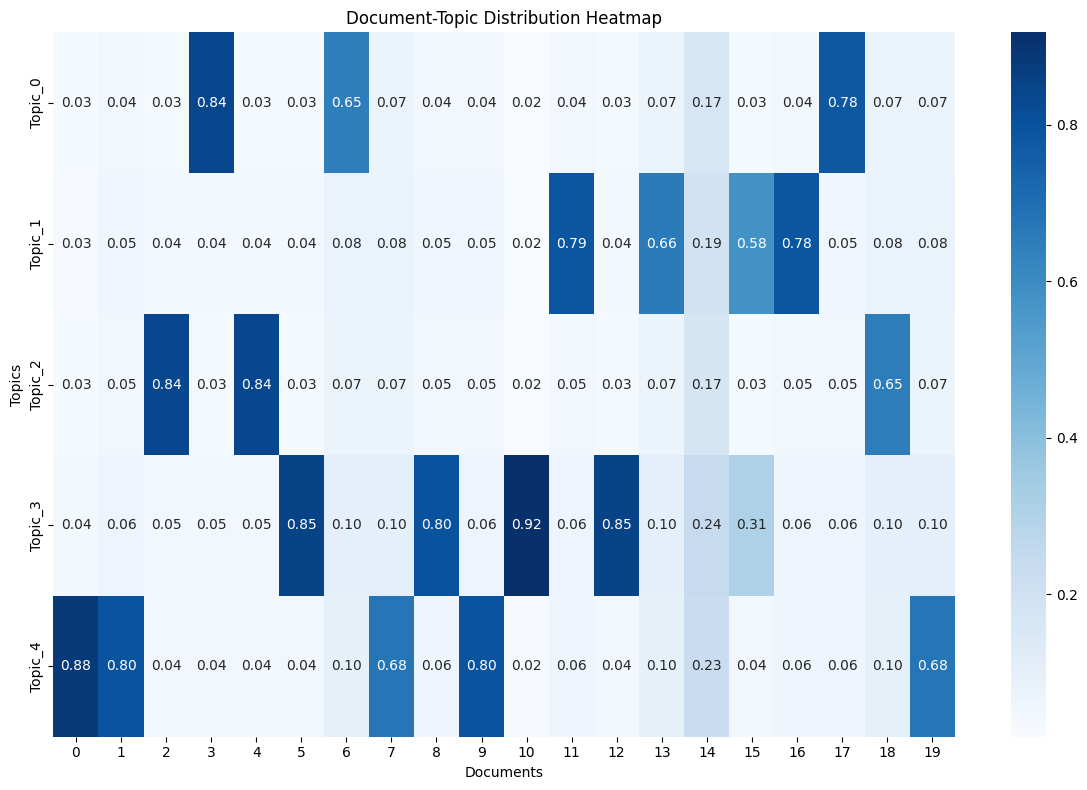

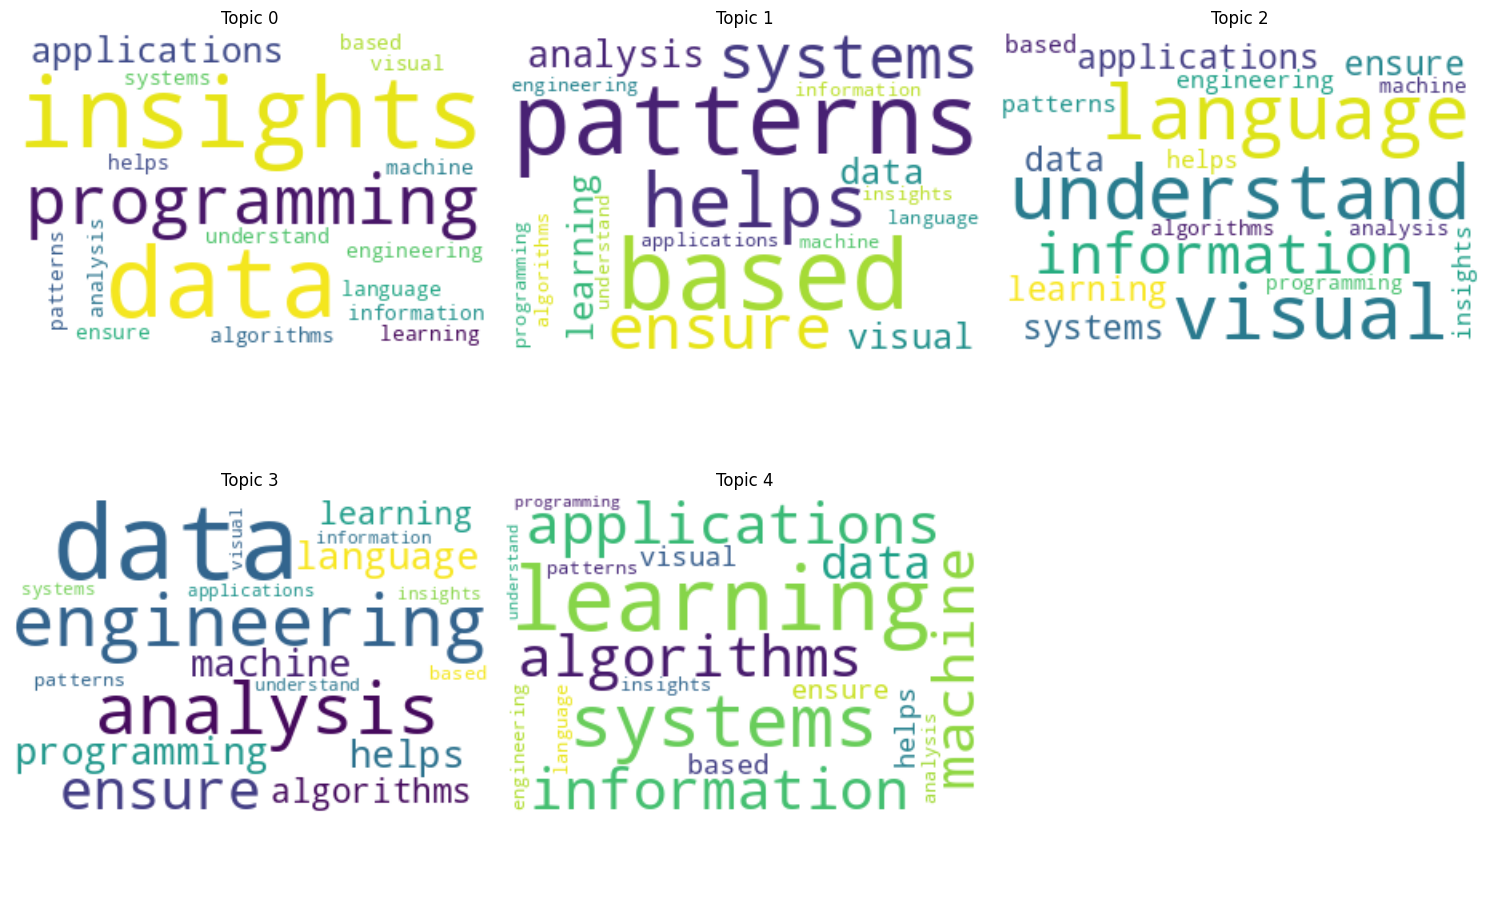


=== Advanced Topic Analysis ===


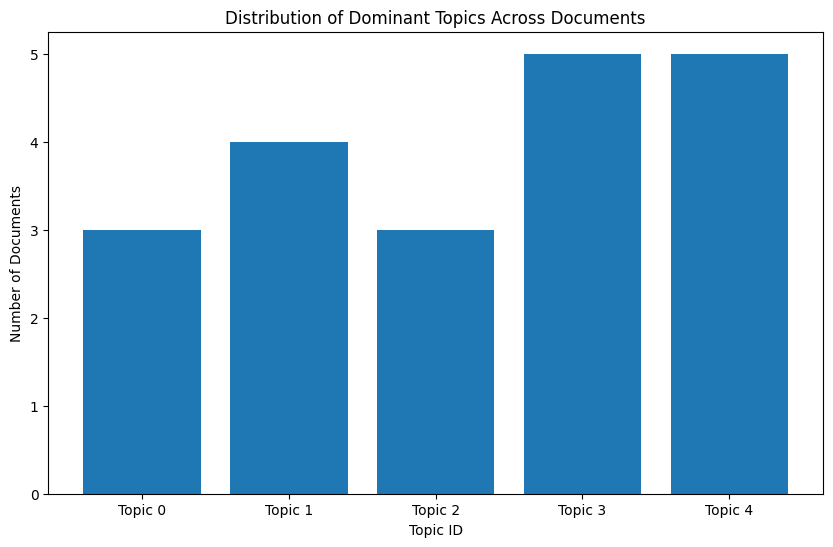


=== Document Similarity Analysis ===
Documents most similar to document 0:
Doc 0: 1.0000
Doc 12: 0.5082
Doc 10: 0.4858
Doc 19: 0.4206
Doc 1: 0.2409

=== Document Classification Demo ===
Classifying: 'Deep neural networks are powerful machine learning...'
Topic probabilities:
  Topic 0: 0.0446
  Topic 1: 0.0507
  Topic 2: 0.0450
  Topic 3: 0.0648
  Topic 4: 0.7949
Most similar document: 0 (similarity: 0.7341)


=== Topic Model Comparison ===
Topics: 3, Coherence: 0.6151, Perplexity: -3.4751
Topics: 5, Coherence: 0.6151, Perplexity: -3.8006
Topics: 7, Coherence: 0.6151, Perplexity: -3.9544
Topics: 10, Coherence: 0.6151, Perplexity: -4.1281


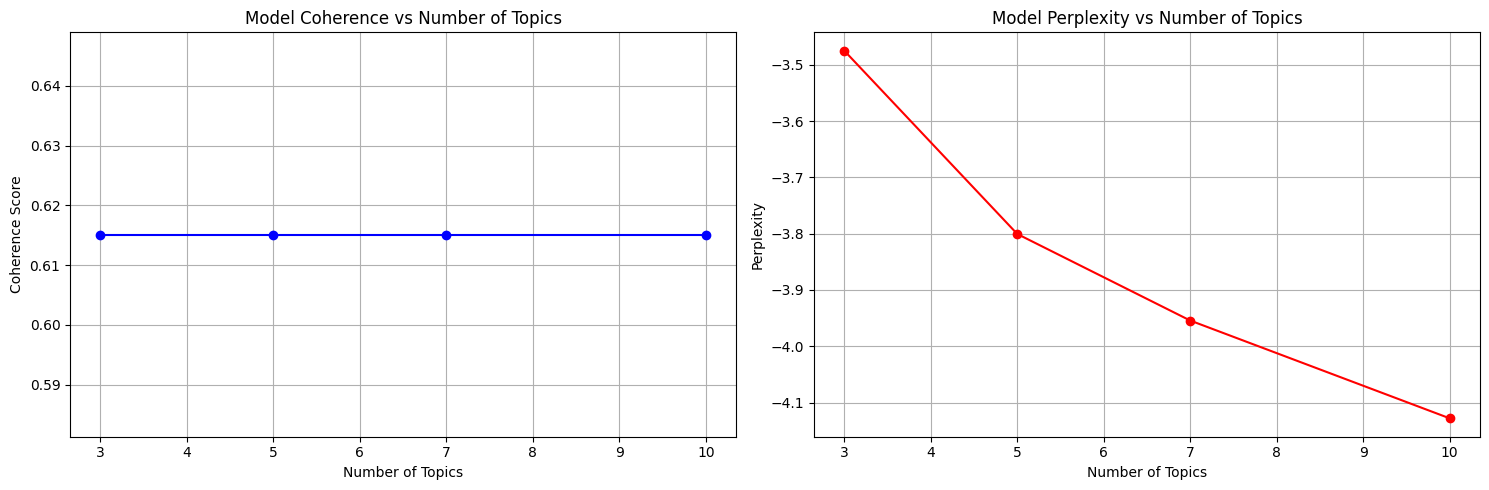



=== Semantic Search: 'artificial intelligence neural networks deep learning' ===
Top matching documents:
1. Document 19 (Score: 1.0000)
   Content: reinforcement learning trains agents interaction dynamic environments...
2. Document 1 (Score: 0.5729)
   Content: neural networks deep learning revolutionized artificial intelligence applications...
3. Document 0 (Score: 0.4206)
   Content: machine learning algorithms transforming way process data predictions...
4. Document 10 (Score: 0.3203)
   Content: python programming language widely data analysis machine learning...
5. Document 16 (Score: 0.0000)
   Content: recommendation systems suggest relevant items based user preferences behavior...

Pipeline completed successfully!
Final coherence score: 0.6151
Vocabulary size: 18
Word2Vec model size: 100 dimensions

Models trained and ready for use!
Access models via: pipeline.lda_model, pipeline.word2vec_model, pipeline.tfidf_model


In [6]:
if __name__ == "__main__":
    pipeline = AdvancedGensimPipeline()
    results = pipeline.run_complete_pipeline()

    print("\n" + "="*60)
    coherence_scores, perplexity_scores = compare_topic_models(pipeline)

    print("\n" + "="*60)
    search_results = semantic_search_engine(
        pipeline,
        "artificial intelligence neural networks deep learning"
    )

    print("\n" + "="*60)
    print("Pipeline completed successfully!")
    print(f"Final coherence score: {results['coherence_score']:.4f}")
    print(f"Vocabulary size: {len(pipeline.dictionary)}")
    print(f"Word2Vec model size: {pipeline.word2vec_model.wv.vector_size} dimensions")

    print("\nModels trained and ready for use!")
    print("Access models via: pipeline.lda_model, pipeline.word2vec_model, pipeline.tfidf_model")